# 動物標本を用いた局所冷却実験の解析

### 解析するデータ
データは20170924にnumpyデータが入っている
- 2005-04-16-1/S0025
- 2005-08-24-2/S0011
- 2006-02-18-1/S0011

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
import copy
%matplotlib inline

In [4]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap

## 20170925のデータを詳細に解析
なぜか出力画像を読み込むと，赤色と青色が反転している・・・

### 1枚だけ処理して確認

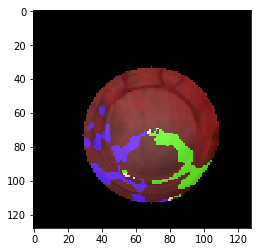

In [23]:
temp = cv2.imread('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170925/2005-04-16-1/C001S0025@/all/002170.png')
pic = copy.deepcopy(temp)
pic[:, :, 0] = temp[:, :, 2]
pic[:, :, 2] = temp[:, :, 0]

center_x = 69
center_y = 73

for i in range(128):
    for j in range(128):
        if (i-center_x)*(i-center_x)+(j-center_y)*(j-center_y) > 1600:
            pic[j, i, :] = 0
            
#cv2.putText(pic, "{0:0>4}".format(2170), (2,12), cv2.FONT_HERSHEY_PLAIN,.8,(0,0,0))
#cv2.putText(pic, "{0:0>4}".format(1367), (2,10), cv2.FONT_HERSHEY_PLAIN,.5,(255,255,255))
plt.imshow(pic)

### 画像をまとめて出力

In [37]:
for i, time in enumerate(range(9501)):
    temp = cv2.imread('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170927/2006-02-18-1/C001S0011@/all/{0:06d}.png'.format(time))
    pic = copy.deepcopy(temp)
    #pic[:, :, 0] = temp[:, :, 2]
    #pic[:, :, 2] = temp[:, :, 0]
    center_x = 69
    center_y = 73

    for j in range(128):
        for k in range(128):
            if (j-center_x)*(j-center_x)+(k-center_y)*(k-center_y) > 1600:
                pic[k, j, :] = 0
    cv2.putText(pic, "{0:0>4}".format(time), (5,15), cv2.FONT_HERSHEY_PLAIN,.8,(255,255,255))
    cv2.imwrite('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170927/2006-02-18-1/C001S0011@/circle/{0:0>6}.png'.format(i), pic)

In [38]:
cmd = 'ffmpeg -r 30 -y -i "{0}/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170927/2006-02-18-1/C001S0011@/circle')

In [39]:
subprocess.call(cmd, shell=True)

0

### 部分的な動画作成

In [42]:
for i, time in enumerate(range(5265, 5376)):
    temp = cv2.imread('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170927/2006-02-18-1/C001S0011@/all/{0:06d}.png'.format(time))
    pic = copy.deepcopy(temp)
    cv2.putText(pic, "{0:0>4}".format(time), (5,15), cv2.FONT_HERSHEY_PLAIN,.8,(255,255,255))
    cv2.imwrite('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170927/2006-02-18-1/C001S0011@/5265-5375/{0:0>6}.png'.format(i), pic)
    
cmd = 'ffmpeg -r 5 -y -i "{0}/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "{0}/movie.mp4"'.format('/mnt/recordings/AnalysisResult/Seno/opmap/HRS2018/20170927/2006-02-18-1/C001S0011@/5265-5375')
subprocess.call(cmd, shell=True)

0